In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
def utility(c, gamma):
    if (c<0):
        return -float('inf')
    else:
        return (c**(1-gamma))/(1-gamma)
def generate_R(s,a,params):
    N=len(a)
    w, r ,beta, gamma, PMat, I=params
    CapRMat=np.zeros((len(s),N,N))
    for j in range(len(s)):
        for ni in range(N):
            for nh in range(N):
                c=(1+r)*a[ni]+w*(s[j]-1)-a[nh]
                CapRMat[j][ni,nh]=utility(c, gamma)
    return CapRMat

def get_index(tvMaxIndex,a,s):
    g=np.ones((N,len(s)))
    for hi in range(len(s)):
        g[:,hi]=np.array(a[tvMaxIndex][0+hi*N:N+hi*N]).T
    return g

def iterate_N_times(s,a,params,vVec):
    w, r ,beta, gamma, PMat, I=params
    CapRMat=generate_R(s,a,params)
    
    PMatN=np.zeros((2*N,2))
    for hp in range(2):
        PMatN[0:N,hp]=PMat[0,hp]
        PMatN[N:2*N,hp]=PMat[1,hp]

    CapRMatConc=np.concatenate((CapRMat[0], CapRMat[1]), axis=0 )
    vVecMat=np.matrix([vVec.T.tolist()[0] for ito in range(N)]).T
    tvUnmax=CapRMatConc\
    +beta*( np.kron(np.matrix(PMatN[:,0]).T,vVec[0:N].T) \
    + np.kron(np.matrix(PMatN[:,1]).T,vVec[0+N:N+N].T)  )
    tvMaxed=np.max(tvUnmax,axis=1)
    tvMaxIndex=tvUnmax.argmax(axis=1)
    g=get_index(tvMaxIndex,a,s)
    
    return tvMaxed, g

def get_consump(a, s, g, params):
    w, r ,beta, gamma, PMat, I=params
    aa=np.array([[list(a)][0] for i in range(2)]).T
    ss=np.matrix(s)
    c_plot=aa*(1+r)+(ss-1)*w-g
    return c_plot

def DP_sol(N, gamma):
    
    aStart=0.5
    aEnd=3
    a=np.array([aStart+(aEnd-aStart)/(N-1)*i for i in range(N)])
    s=np.array([1,2])
    aDict=dict()
    for ni, ai in enumerate(a):
        aDict[ai]=ni

    #initialize policy map (matrix)
    g=np.ones((N,len(s)))
    for ni in range(N):
        g[ni, 0]=a[random.randint(0,N-1)]
        g[ni, 1]=a[random.randint(0,N-1)]

    w=0.5
    r=0.04
    beta=0.98
    
    PMat=np.array( [[0.35, 0.65], [ 0.05, 0.95]])
    I=np.eye(2*N)

    params=[w, r ,beta, gamma, PMat, I]
    
    
    
    # solve
    iterN =500
    vVec=np.zeros((2*N,1))
    tvMaxed=vVec

    for nIter in range(iterN):
        #vVec=step_one(g,s,aDict,params) 
        tvMaxed, g=iterate_N_times(s,a,params,tvMaxed) #update g for step_one
    c_plot=get_consump(a, s, g, params)

    plt.figure()
    plt.plot(a, g, '-.')
    plt.title('N='+str(N)+', γ='+str(gamma))
    plt.xlabel('a(t)')
    plt.ylabel('a(t+1)')
    plt.legend(['s=1','s=2'])


    plt.figure()
    plt.plot(a, c_plot, '-.')
    plt.title('N='+str(N)+', γ='+str(gamma))
    plt.xlabel('a(t)')
    plt.ylabel('c(t)')
    plt.legend(['s=1','s=2'])


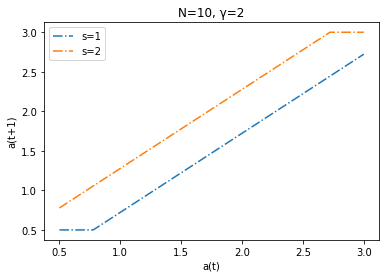

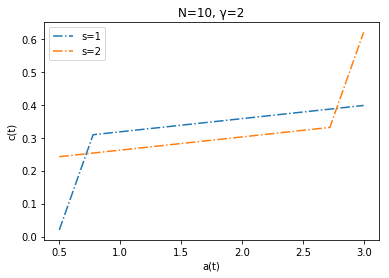

In [3]:
N=10
gamma=2
DP_sol(N, gamma)